In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
students=pd.read_csv("Students_Grading_Dataset.csv")

In [3]:
students.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [4]:
students.shape

(5000, 23)

In [5]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [6]:
students.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


In [7]:
students.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

In [8]:
students.fillna({
    "Attendance (%)": students['Attendance (%)'].mean(),
    "Assignments_Avg": students['Assignments_Avg'].median(),
    "Parent_Education_Level": "NA"
}, inplace=True)

In [9]:
students.isnull().sum()

Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

In [12]:
students.duplicated().sum()

0

In [14]:
students.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [18]:
students.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'], inplace=True)

In [19]:
students

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Engineering,52.290000,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,Male,18,Engineering,97.270000,97.23,45.80,74.81,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NA,Medium,4,9.0
2,Male,24,Business,57.190000,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,Female,24,Mathematics,95.150000,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,Female,23,CS,54.180000,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,19,Business,75.431409,82.15,60.33,80.09,99.32,5.00,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,Male,19,Business,65.110000,86.31,49.80,74.81,88.08,2.79,60.87,95.96,C,5.0,No,Yes,NA,Medium,4,4.0
4997,Female,24,CS,87.540000,63.55,64.21,94.28,50.19,3.13,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,Male,23,CS,92.560000,79.79,94.28,81.20,61.18,0.40,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


In [ ]:
def detect_outliers(col):
    Q1 = students[col].quantile(0.25)
    Q3 = students[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return students[(students[col] < lower_bound) | (students[col] > upper_bound)]


# Columns to check
numerical_columns = [
    "Age",
    "Attendance (%)",
    "Midterm_Score",
    "Assignments_Avg",
    "Quizzes_Avg", 
    "Final_Score",
    "Total_Score",
    "Study_Hours_per_Week",
    "Stress_Level (1-10)",
    "Sleep_Hours_per_Night",
]

# Detect and count outliers
for col in numerical_columns:
    outliers = detect_outliers(col)
    print(f"{col}: {len(outliers)} outliers detected")

# Option 1: Cap outliers at 5th and 95th percentiles
for col in numerical_columns:
    lower_cap = students[col].quantile(0.05)
    upper_cap = students[col].quantile(0.95)
    students[col] = np.clip(students[col], lower_cap, upper_cap)

Age: 0 outliers detected
Attendance (%): 0 outliers detected
Midterm_Score: 0 outliers detected
Assignments_Avg: 0 outliers detected
Quizzes_Avg: 0 outliers detected
Final_Score: 0 outliers detected
Total_Score: 0 outliers detected
Study_Hours_per_Week: 0 outliers detected
Stress_Level (1-10): 0 outliers detected
Sleep_Hours_per_Night: 0 outliers detected


In [22]:
students[['Final_Score', 'Grade']] # Does not depend just on Final_Score

,Final_Score,Grade
0,57.82,F
1,45.80,A
2,93.68,D
3,80.63,A
4,78.89,F
...,...,...
4995,60.33,D
4996,49.80,C
4997,64.21,A
4998,94.28,A


In [26]:
students[
    [
        "Assignments_Avg",
        "Quizzes_Avg",
        "Participation_Score",
        "Projects_Score",
        "Midterm_Score",
        "Final_Score",
        "Total_Score",
        "Grade",
    ]
]

,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Midterm_Score,Final_Score,Total_Score,Grade
0,84.22,74.0600,3.99,85.90,55.03000,57.82,56.090000,F
1,74.81,94.2400,8.32,55.65,97.12005,45.80,52.449975,A
2,67.70,85.7000,5.05,73.79,67.05000,93.68,70.300000,D
3,66.06,93.5100,6.54,92.12,47.79000,80.63,61.630000,A
4,96.85,83.7000,5.97,68.42,46.59000,78.89,66.130000,F
...,...,...,...,...,...,...,...,...
4995,80.09,97.5705,5.00,58.42,82.15000,60.33,85.210000,D
4996,74.81,88.0800,2.79,60.87,86.31000,49.80,95.960000,C
4997,94.28,52.4175,3.13,82.65,63.55000,64.21,54.250000,A
4998,81.20,61.1800,0.40,94.29,79.79000,94.28,55.840000,A


In [27]:
students.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000
mean,21.048400,75.438258,70.335497,69.633149,74.801551,74.912274,4.980024,74.924860,75.121178,17.66192,5.48080,6.487980
std,1.989786,13.377108,16.954540,16.990423,13.397575,14.305777,2.890136,14.423415,14.192347,7.17993,2.86155,1.438748
min,18.000000,52.899950,43.290000,42.979900,52.830000,52.417500,0.000000,50.010000,52.449975,6.30000,1.00000,4.200000
25%,19.000000,64.737500,55.457500,54.667500,63.687500,62.490000,2.440000,62.320000,62.835000,11.40000,3.00000,5.200000
50%,21.000000,75.431409,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.50000,5.00000,6.500000
75%,23.000000,86.182500,84.970000,84.500000,85.570000,87.630000,7.500000,87.367500,87.652500,24.10000,8.00000,7.700000
max,24.000000,97.520025,97.120050,96.790000,97.090500,97.570500,10.000000,100.000000,97.510150,28.90000,10.00000,8.800000


In [32]:
students["Total_Evaluation_Score"] = students[
    [
        "Assignments_Avg",
        "Quizzes_Avg",
        "Participation_Score",
        "Projects_Score",
        "Midterm_Score",
        "Final_Score",
        "Total_Score",
    ]
].sum(axis=1)/6.10

In [36]:
df_temp = students.copy()

In [37]:
label_encoders = {}
for col in df_temp.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_temp[col] = le.fit_transform(df_temp[col])
    label_encoders[col] = le

In [41]:
df_temp.drop(columns=['Total_Evaluation_Score'], inplace=True)

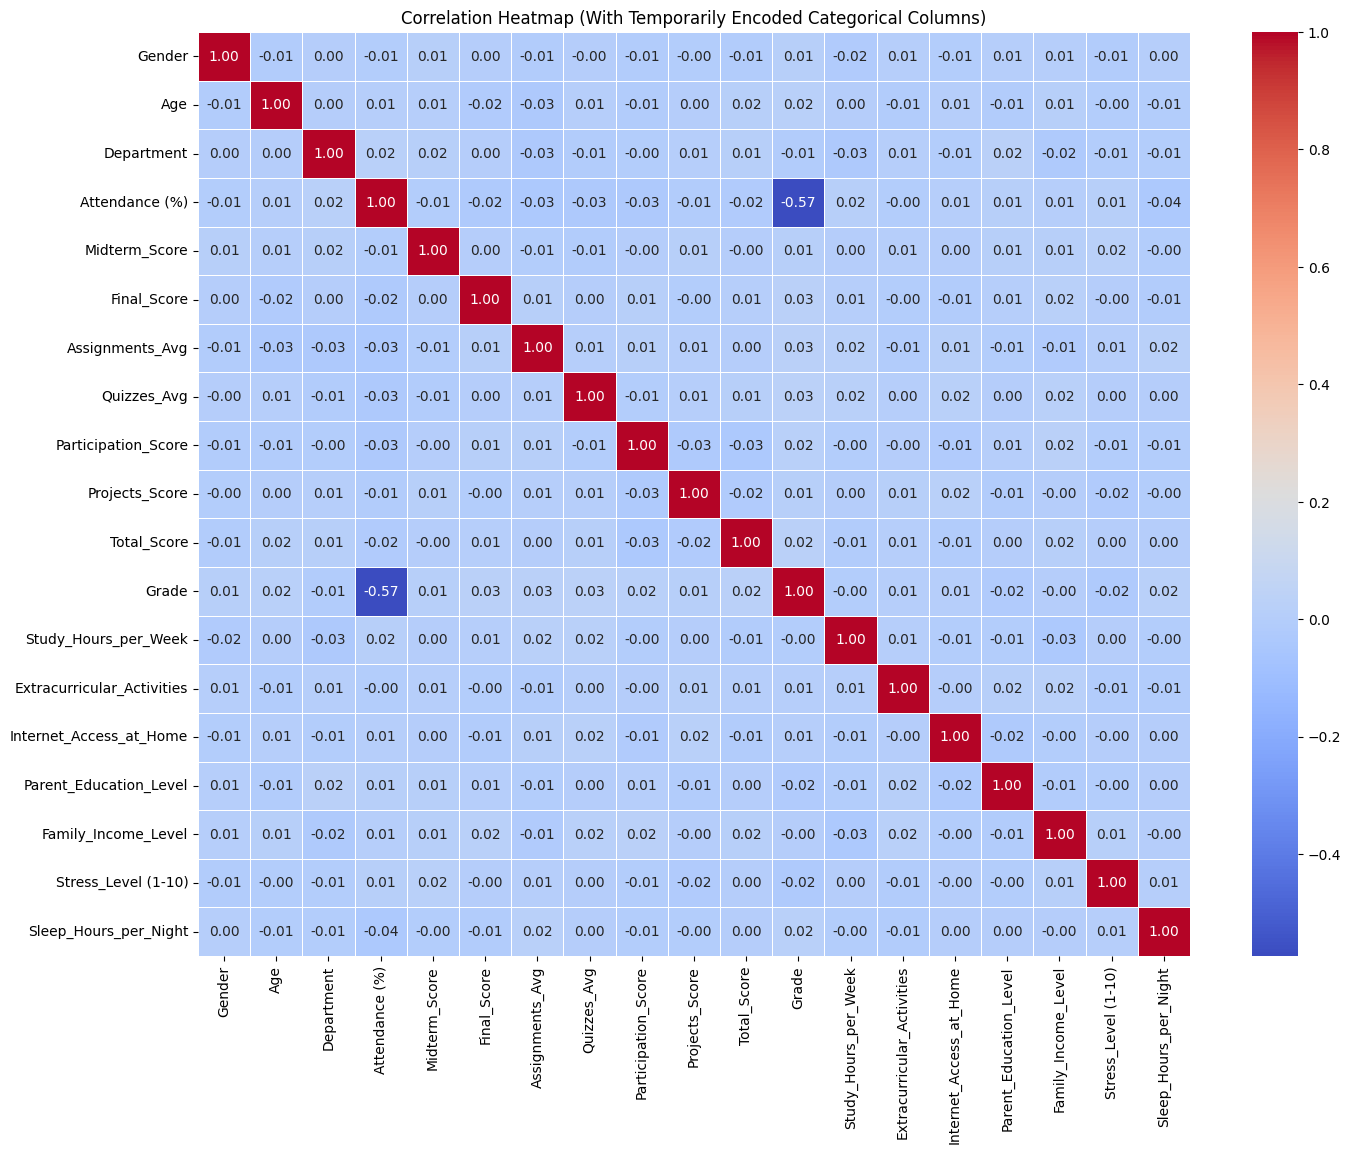

In [42]:
correlation_matrix = df_temp.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (With Temporarily Encoded Categorical Columns)")
plt.show()

In [43]:
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ["Feature 1", "Feature 2", "Correlation"]
correlation_pairs = correlation_pairs[
    correlation_pairs["Feature 1"] != correlation_pairs["Feature 2"]
]
correlation_pairs = correlation_pairs.reindex(
    correlation_pairs["Correlation"].abs().sort_values(ascending=False).index
)
correlation_pairs = correlation_pairs.iloc[::2]
print(correlation_pairs.head(10))

                 Feature 1            Feature 2  Correlation
68          Attendance (%)                Grade    -0.573533
345  Sleep_Hours_per_Night       Attendance (%)    -0.035059
117        Assignments_Avg       Attendance (%)    -0.034492
198            Total_Score  Participation_Score    -0.033408
244   Study_Hours_per_Week  Family_Income_Level    -0.032951
115        Assignments_Avg                  Age    -0.031207
216                  Grade          Quizzes_Avg     0.029155
230   Study_Hours_per_Week           Department    -0.028432
44              Department      Assignments_Avg    -0.028058
106            Final_Score                Grade     0.028017


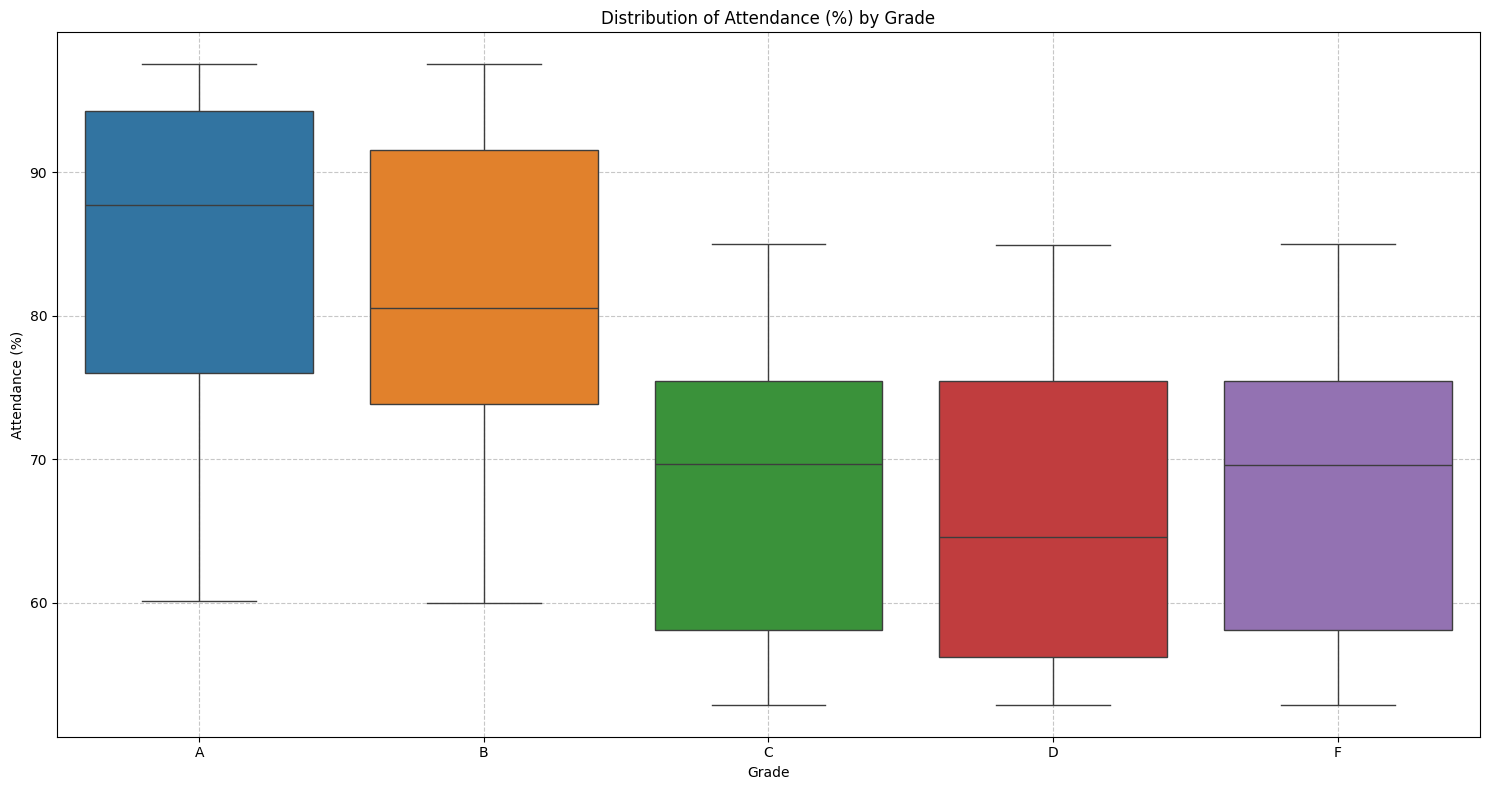

In [50]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="Grade", y="Attendance (%)", data=students.sort_values(by="Grade"), hue="Grade")
plt.title("Distribution of Attendance (%) by Grade")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

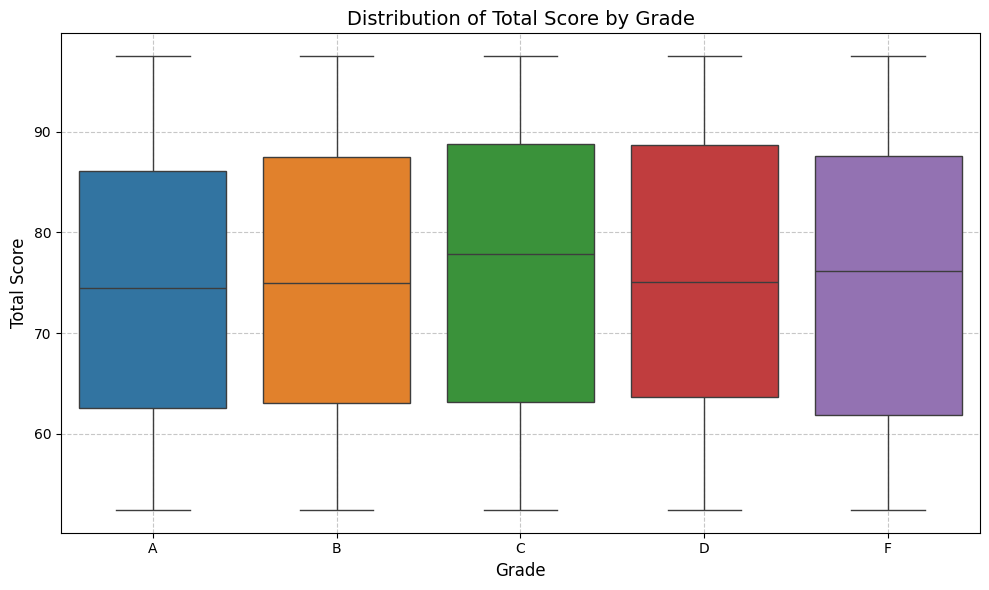

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Grade", y="Total_Score", data=students.sort_values(by="Grade"), hue="Grade")
plt.title("Distribution of Total Score by Grade", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Total Score", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Average Total Score by Grade:
Grade
A    74.453008
B    74.986195
C    76.090348
D    75.532166
F    75.116487
Name: Total_Score, dtype: float64


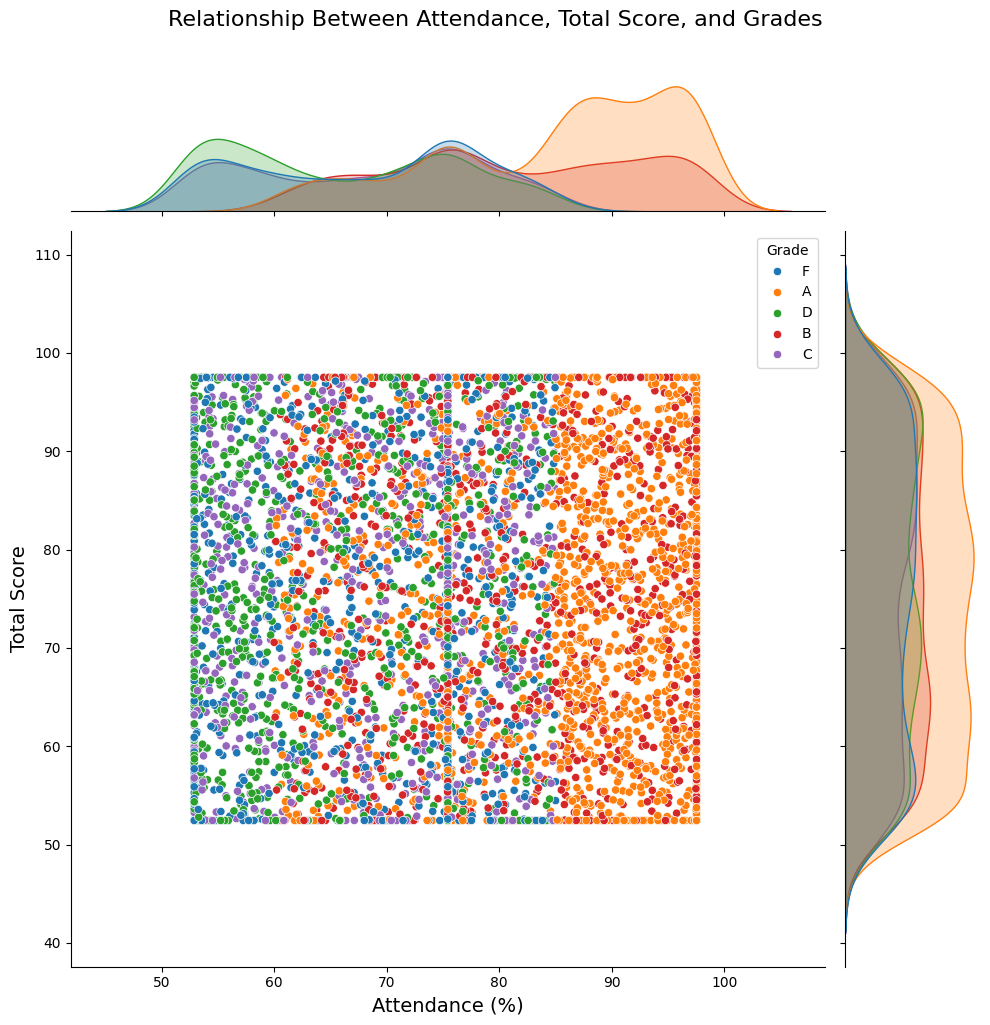

In [54]:
grade_totalscore_avg = students.groupby("Grade")["Total_Score"].mean().sort_index()
print("\nAverage Total Score by Grade:")
print(grade_totalscore_avg)
correlation = students["Attendance (%)"].corr(students["Total_Score"])

g = sns.jointplot(
    x="Attendance (%)", y="Total_Score", data=students, kind="scatter", height=10, hue="Grade"
)
g.fig.suptitle(
    "Relationship Between Attendance, Total Score, and Grades", y=1.02, fontsize=16
)
g.set_axis_labels("Attendance (%)", "Total Score", fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\krish\AppData\Local\Temp\ipykernel_12952\2681528038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


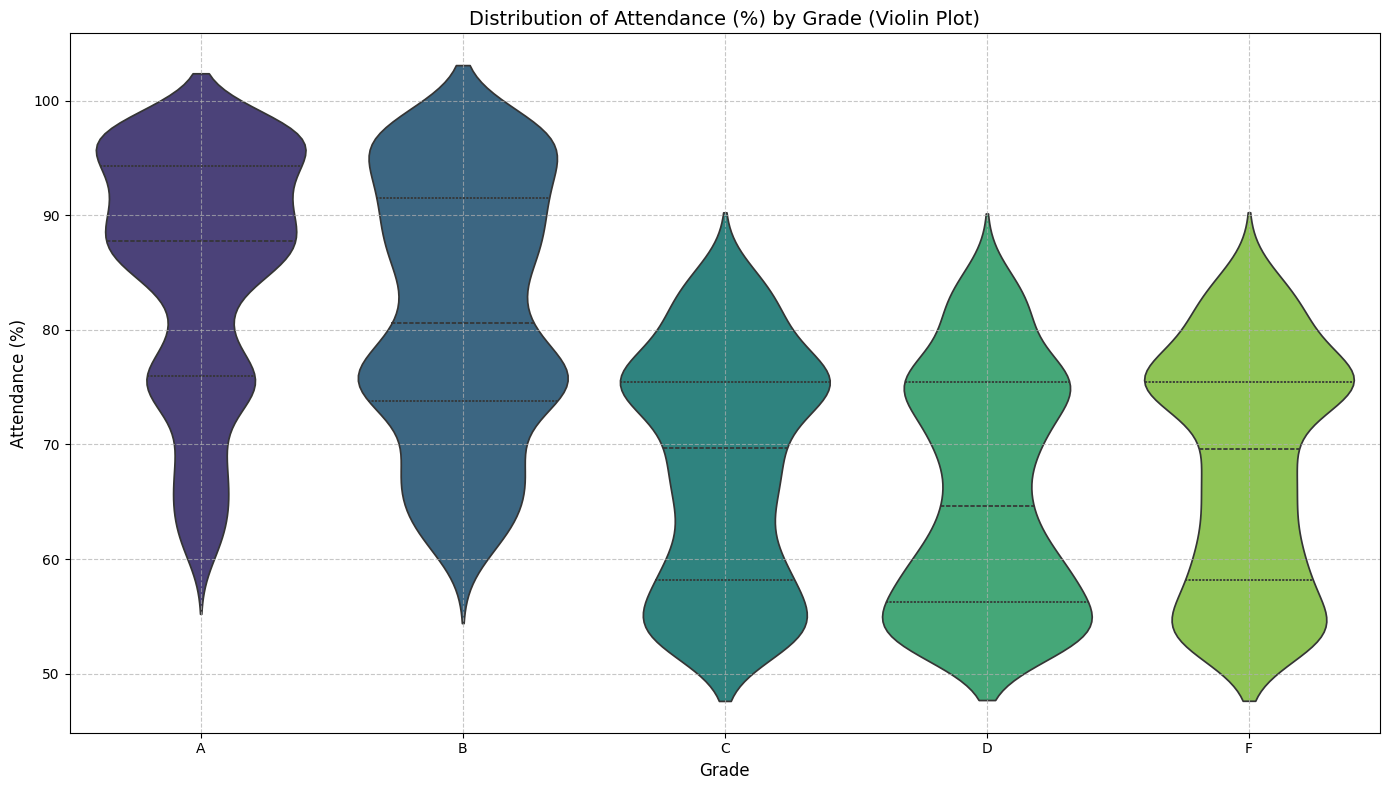

In [56]:
plt.figure(figsize=(14, 8))
sns.violinplot(
    x="Grade",
    y="Attendance (%)",
    data=students.sort_values(by="Grade"),
    inner="quartile",
    palette="viridis",
)
plt.title("Distribution of Attendance (%) by Grade (Violin Plot)", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Attendance (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [62]:
numeric_cols = students.select_dtypes(include=["int64", "float64"]).columns
numeric_df = students[numeric_cols]

correlations_with_grade = numeric_df.corr()
print("Correlations with Grade (from highest to lowest):")
print(correlations_with_grade)



Correlations with Grade (from highest to lowest):
                             Age  Attendance (%)  Midterm_Score  Final_Score  \
Age                     1.000000        0.008759       0.006475    -0.016310   
Attendance (%)          0.008759        1.000000      -0.007398    -0.023531   
Midterm_Score           0.006475       -0.007398       1.000000     0.000870   
Final_Score            -0.016310       -0.023531       0.000870     1.000000   
Assignments_Avg        -0.031207       -0.034492      -0.006959     0.010565   
Quizzes_Avg             0.007826       -0.026631      -0.011810     0.003933   
Participation_Score    -0.014129       -0.027949      -0.000314     0.014096   
Projects_Score          0.002401       -0.012844       0.014623    -0.003115   
Total_Score             0.016326       -0.018263      -0.000089     0.006906   
Study_Hours_per_Week    0.000803        0.015497       0.002277     0.008988   
Stress_Level (1-10)    -0.004474        0.012030       0.019405    -0.

In [63]:
df=students

In [64]:
print("Attendance (%) thresholds:")
print(
    f"Minimum Attendance for A: {df[df['Grade'] == 'A']['Attendance (%)'].min():.2f}%"
)
print(
    f"Minimum Attendance for B: {df[df['Grade'] == 'B']['Attendance (%)'].min():.2f}%"
)

above_60 = df[df["Attendance (%)"] >= 60]
below_60 = df[df["Attendance (%)"] < 60]

print("\nGrades for students with ≥60% attendance:")
print(above_60["Grade"].value_counts())

print("\nGrades for students with <60% attendance:")
print(below_60["Grade"].value_counts())

above_90 = df[df["Attendance (%)"] >= 90]
print("\nGrades for students with ≥90% attendance:")
print(above_90["Grade"].value_counts())

bins = [0, 60, 70, 80, 90, 100]
labels = ["<60%", "60-70%", "70-80%", "80-90%", "≥90%"]
df = df.copy()
df.loc[:, "Attendance_Tier"] = pd.cut(df["Attendance (%)"], bins=bins, labels=labels)

attendance_grade = (
    pd.crosstab(df["Attendance_Tier"], df["Grade"], normalize="index") * 100
)
print("\nPercentage of each grade within attendance tiers:")
print(attendance_grade)

score_cols = [
    "Attendance (%)",
    "Midterm_Score",
    "Final_Score",
    "Quizzes_Avg",
    "Participation_Score",
    "Projects_Score",
    "Total_Score",
]


Attendance (%) thresholds:
Minimum Attendance for A: 60.10%
Minimum Attendance for B: 60.00%

Grades for students with ≥60% attendance:
Grade
A    1495
B     978
F     589
C     556
D     531
Name: count, dtype: int64

Grades for students with <60% attendance:
Grade
D    358
F    255
C    238
Name: count, dtype: int64

Grades for students with ≥90% attendance:
Grade
A    607
B    283
Name: count, dtype: int64

Percentage of each grade within attendance tiers:
Grade                    A          B          C          D          F
Attendance_Tier                                                       
<60%              0.000000   0.117371  27.934272  42.018779  29.929577
60-70%           20.276498  21.428571  18.894009  19.470046  19.930876
70-80%           19.131044  20.042046  20.252278  18.990890  21.583742
80-90%           45.586708  23.052960  10.695742   9.449637  11.214953
≥90%             68.202247  31.797753   0.000000   0.000000   0.000000


<Figure size 1200x600 with 0 Axes>

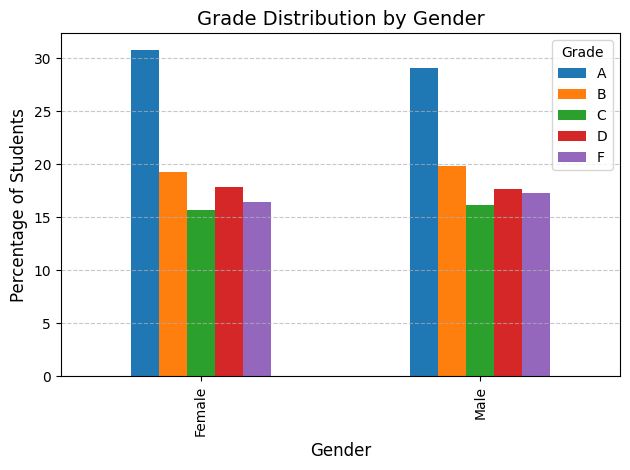

In [66]:
gender_grade = (
    pd.crosstab(df["Gender"], df["Grade"], normalize="index") * 100
)

plt.figure(figsize=(12, 6))
gender_grade.plot(kind="bar", stacked=False)
plt.title("Grade Distribution by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Percentage of Students", fontsize=12)
plt.legend(title="Grade")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

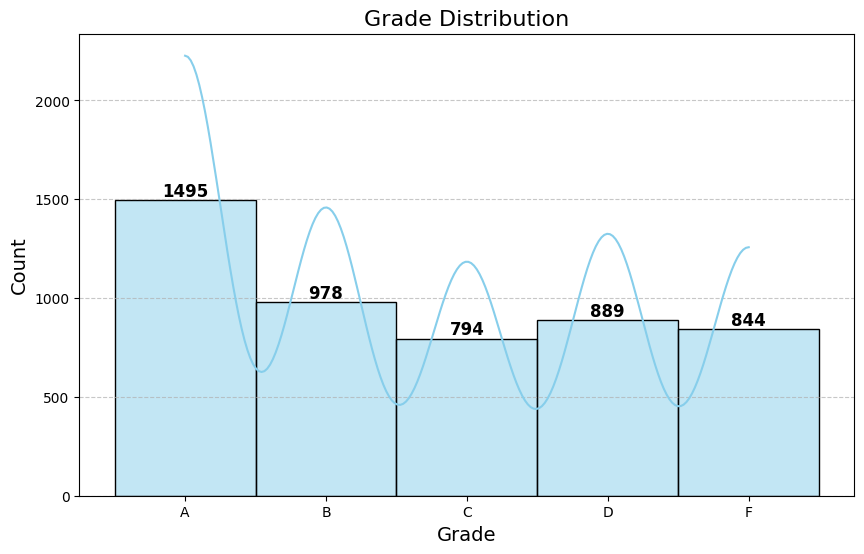

In [69]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    df["Grade"].sort_values(),
    bins=len(df["Grade"].value_counts()),
    kde=True,
    discrete=True,
    color="skyblue",
    edgecolor="black",
)
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
    )

plt.xlabel("Grade", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Grade Distribution", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

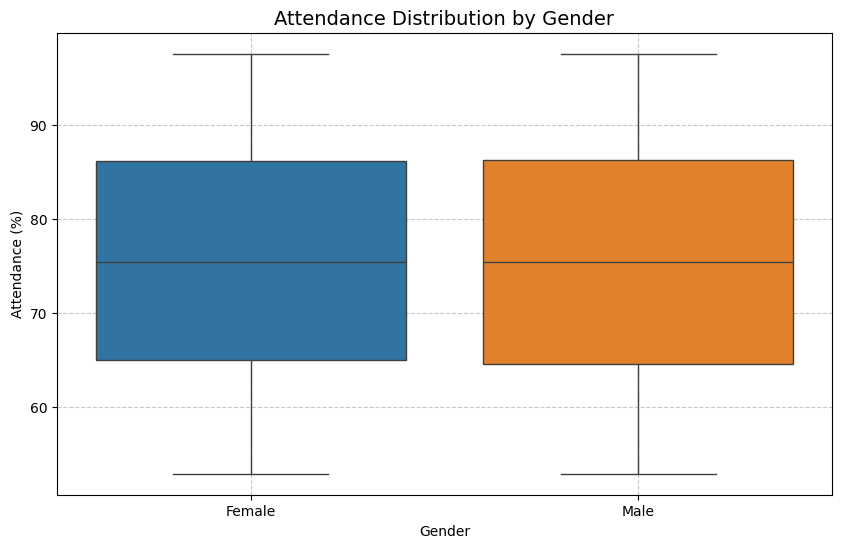

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Gender", y="Attendance (%)", data=df, hue="Gender")
plt.title("Attendance Distribution by Gender", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
# plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

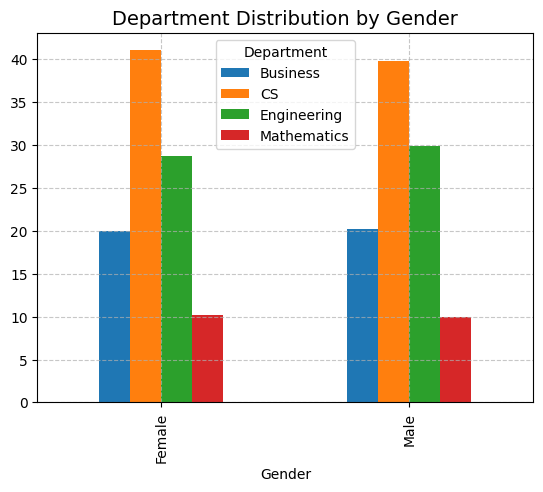

In [75]:
plt.figure(figsize=(10, 6))
(pd.crosstab(df['Gender'], df['Department'], normalize='index') * 100).plot(kind="bar")
plt.title("Department Distribution by Gender", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
# plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

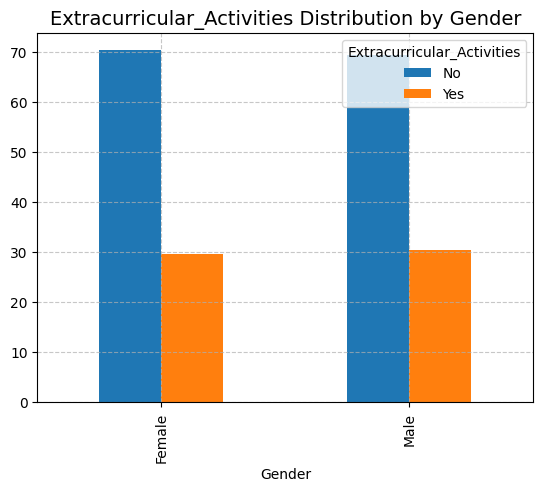

In [76]:
plt.figure(figsize=(10, 6))
(
    pd.crosstab(df["Gender"], df["Extracurricular_Activities"], normalize="index") * 100
).plot(kind="bar")
plt.title("Extracurricular_Activities Distribution by Gender", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
# plt.tight_layout()
plt.show()

Age distribution in the dataset:
Age
18    682
19    705
20    671
21    753
22    732
23    734
24    723
Name: count, dtype: int64


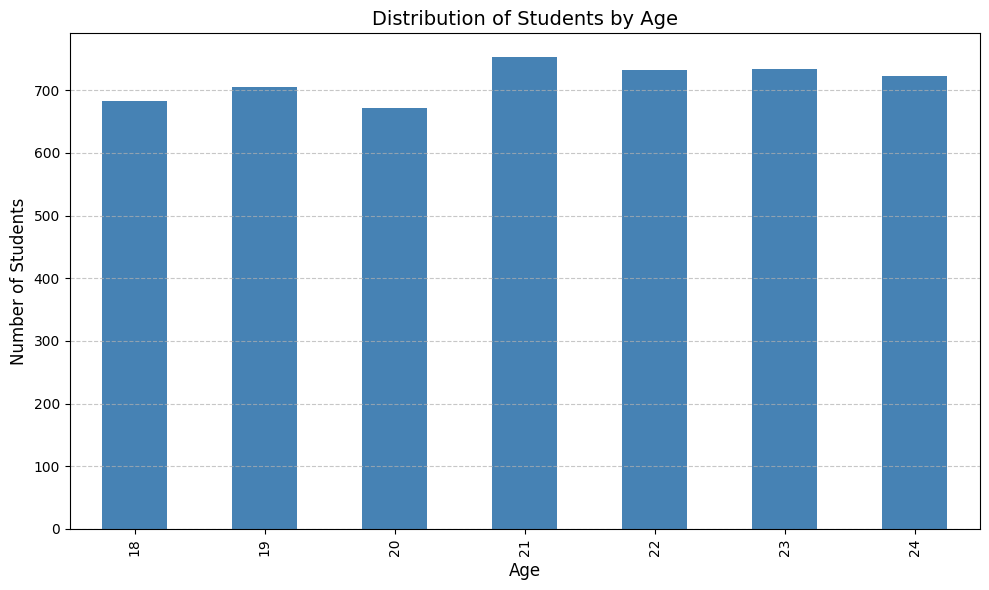

<Figure size 1200x600 with 0 Axes>

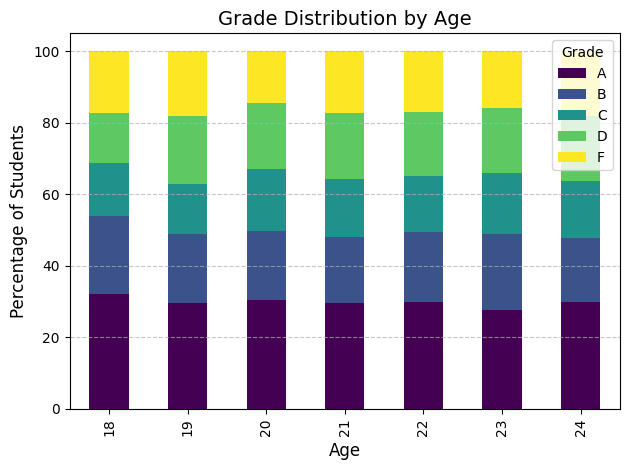

In [78]:
age_counts = df["Age"].value_counts().sort_index()
print("Age distribution in the dataset:")
print(age_counts)

# Create a bar chart to visualize age distribution
plt.figure(figsize=(10, 6))
age_counts.plot(kind="bar", color="steelblue")
plt.title("Distribution of Students by Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Now, let's analyze the relationship between age and grades
plt.figure(figsize=(12, 6))
age_grade = pd.crosstab(df["Age"], df["Grade"], normalize="index") * 100
age_grade.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Grade Distribution by Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Percentage of Students", fontsize=12)
plt.legend(title="Grade")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

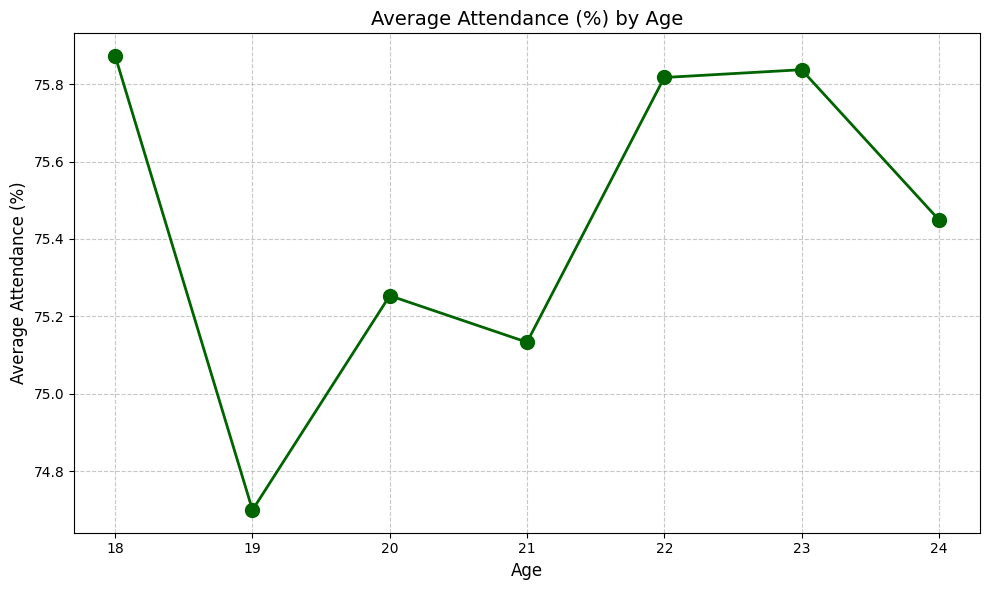

Average Attendance (%) by Age:
Age
18    75.872750
19    74.699205
20    75.253300
21    75.132941
22    75.817288
23    75.837396
24    75.449742
Name: Attendance (%), dtype: float64

Attendance Tier distribution by Age (%):
Attendance_Tier       <60%     60-70%     70-80%     80-90%       ≥90%
Age                                                                   
18               14.809384  17.888563  29.032258  20.527859  17.741935
19               18.297872  19.148936  27.092199  19.148936  16.312057
20               18.032787  16.393443  29.061103  19.523100  16.989568
21               16.865870  16.600266  31.606906  18.459495  16.467463
22               16.666667  16.120219  28.005464  21.721311  17.486339
23               16.485014  17.166213  28.610354  17.847411  19.891008
24               18.118949  18.257261  26.279391  17.704011  19.640387


<Figure size 1400x700 with 0 Axes>

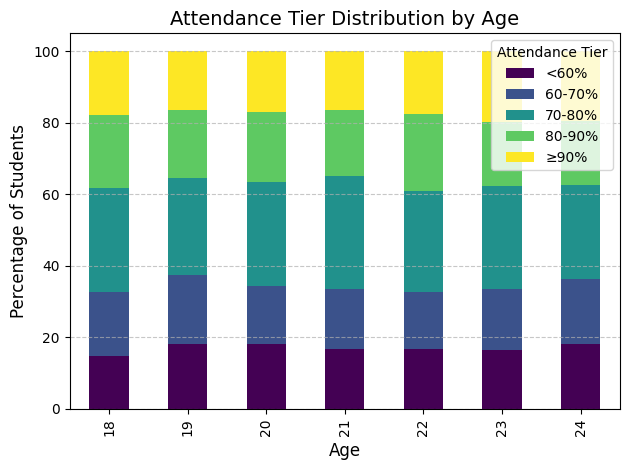


Department distribution by Age (%):
Department   Business         CS  Engineering  Mathematics
Age                                                       
18          18.768328  40.029326    30.645161    10.557185
19          23.120567  40.851064    26.808511     9.219858
20          20.864382  39.493294    29.508197    10.134128
21          21.779548  36.786189    30.810093    10.624170
22          16.530055  43.989071    29.371585    10.109290
23          18.119891  42.643052    29.700272     9.536785
24          21.715076  39.280775    28.769018    10.235131


<Figure size 1400x700 with 0 Axes>

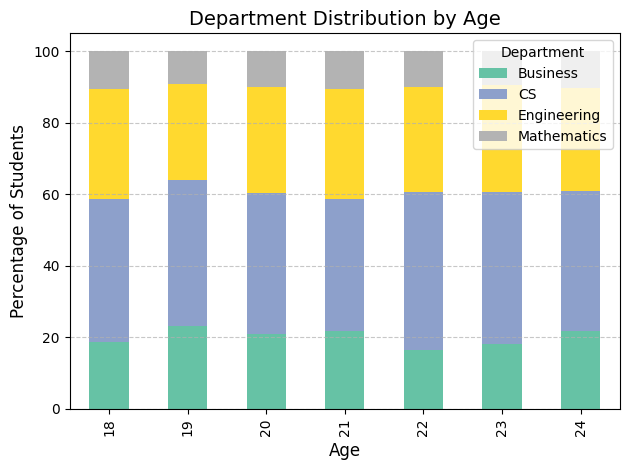

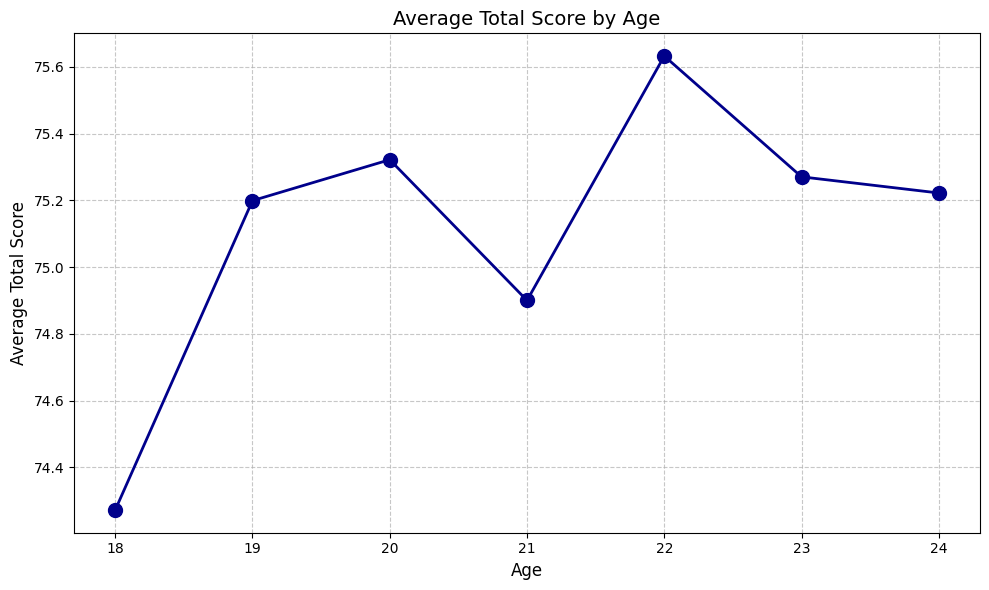

Average Total Score by Age:
Age
18    74.272042
19    75.198928
20    75.321631
21    74.899938
22    75.632234
23    75.270320
24    75.221903
Name: Total_Score, dtype: float64


In [80]:
plt.figure(figsize=(10, 6))
age_attendance = df.groupby("Age")["Attendance (%)"].mean()
plt.plot(
    age_attendance.index,
    age_attendance.values,
    marker="o",
    linestyle="-",
    color="darkgreen",
    linewidth=2,
    markersize=10,
)
plt.title("Average Attendance (%) by Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Average Attendance (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(age_attendance.index)
plt.tight_layout()
plt.show()

print("Average Attendance (%) by Age:")
print(age_attendance)

# Analyze relationship between age and attendance tiers
age_attendance_tier = (
    pd.crosstab(df["Age"], df["Attendance_Tier"], normalize="index") * 100
)
print("\nAttendance Tier distribution by Age (%):")
print(age_attendance_tier)

# Visualize attendance tiers by age
plt.figure(figsize=(14, 7))
age_attendance_tier.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Attendance Tier Distribution by Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Percentage of Students", fontsize=12)
plt.legend(title="Attendance Tier")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Let's analyze the relationship between age and department
age_department = (
    pd.crosstab(df["Age"], df["Department"], normalize="index") * 100
)
print("\nDepartment distribution by Age (%):")
print(age_department)

# Visualize department distribution by age
plt.figure(figsize=(14, 7))
age_department.plot(kind="bar", stacked=True, colormap="Set2")
plt.title("Department Distribution by Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Percentage of Students", fontsize=12)
plt.legend(title="Department")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Analyze relationship between age and total score
plt.figure(figsize=(10, 6))
age_total_score = df.groupby("Age")["Total_Score"].mean()
plt.plot(
    age_total_score.index,
    age_total_score.values,
    marker="o",
    linestyle="-",
    color="darkblue",
    linewidth=2,
    markersize=10,
)
plt.title("Average Total Score by Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Average Total Score", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(age_total_score.index)
plt.tight_layout()
plt.show()

print("Average Total Score by Age:")
print(age_total_score)